In [28]:
import pandas as pd
import psycopg2
import dotenv
import os

dotenv.load_dotenv()

PG_PASSWORD = os.getenv("PG_PASSWORD")
PG_USER = os.getenv("PG_USER")
PG_HOST = os.getenv("PG_HOST")
PG_PORT = os.getenv("PG_PORT")
PG_DATABASE = os.getenv("PG_DB")

# Database connection parameters
import psycopg2
import os

import matplotlib.pyplot as plt
from mplsoccer import Pitch
import matplotlib as mpl
import matplotsoccer

# Executing queries

def execute_query(query):
    return pd.read_sql_query(query, conn)

conn = psycopg2.connect(
    host=PG_HOST,
    database=PG_DATABASE,
    user=PG_USER,
    password=PG_PASSWORD,
    port=PG_PORT,
    sslmode="require",
)

# Query to fetch tracking data
query_team1 = """
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.jersey_number, p.player_name, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg' AND p.team_id = '8y3iucyxguipljcmf87a11bk9' ;
"""
team1 = pd.read_sql_query(query_team1, conn)
team1.head()

,frame_id,timestamp,player_id,x,y,jersey_number,player_name,team_id
0,1722798901000,00:00:01,8fs5klbsyx06c5ds9s1i3xu96,43.652787,59.859855,7,Hong Hyun-Seok,8y3iucyxguipljcmf87a11bk9
1,1722798901000,00:00:01,32sds4yk7ch30mng0gyzhdk9h,33.243034,61.095418,20,S. Mitrović,8y3iucyxguipljcmf87a11bk9
2,1722798901000,00:00:01,60gs7lod7de72ypcs6qfup8q2,51.295410,49.295738,9,A. Guðjohnsen,8y3iucyxguipljcmf87a11bk9
3,1722798901000,00:00:01,3r04y1fejoh9e8qbge3exy3u1,38.027207,22.912636,22,N. Fadiga,8y3iucyxguipljcmf87a11bk9
4,1722798901000,00:00:01,18pgjfpl9s8qy32mblzygsyc5,46.083279,50.121967,24,S. Kums,8y3iucyxguipljcmf87a11bk9


In [29]:
query_team2 = """
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.jersey_number, p.player_name, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg' AND p.team_id = '4dtif7outbuivua8umbwegoo5' ;
"""
team2 = pd.read_sql_query(query_team2, conn)
team2.head()

,frame_id,timestamp,player_id,x,y,jersey_number,player_name,team_id
0,1722802613280,00:01:53.280000,2961iy0sg9zmy0r6fzbr2dmg9,42.925902,9.536163,20,D. Hrnčár,4dtif7outbuivua8umbwegoo5
1,1722802613280,00:01:53.280000,5j8jlykegiplbh3tr6zed88a1,35.564086,48.480000,18,N. Rôdes,4dtif7outbuivua8umbwegoo5
2,1722802613280,00:01:53.280000,77px2f7a0ihv8dchncdfj7r9x,39.519819,41.949964,10,L. Hens,4dtif7outbuivua8umbwegoo5
3,1722802614280,00:01:54.280000,2hr7skflmxmpiiauz04h185ey,49.217049,36.189127,77,B. Nsimba,4dtif7outbuivua8umbwegoo5
4,1722802614280,00:01:54.280000,8lqo2ajhgjockasmd198nai1,23.449155,64.662955,3,J. Pupe,4dtif7outbuivua8umbwegoo5


In [30]:
query_ball="""
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg' AND p.player_id = 'ball'
ORDER BY timestamp;
"""

ball = pd.read_sql_query(query_ball, conn)
ball.head()

,frame_id,timestamp,player_id,x,y,team_id
0,1722802500280,00:00:00.280000,ball,45.750820,50.091803,1oyb7oym5nwzny8vxf03szd2h
1,1722798901000,00:00:01,ball,46.832787,49.868852,1oyb7oym5nwzny8vxf03szd2h
2,1722802501280,00:00:01.280000,ball,37.137500,51.901639,1oyb7oym5nwzny8vxf03szd2h
3,1722798902000,00:00:02,ball,46.311475,54.131148,1oyb7oym5nwzny8vxf03szd2h
4,1722802502280,00:00:02.280000,ball,35.024224,54.380328,1oyb7oym5nwzny8vxf03szd2h


In [31]:
team_query = """
SELECT DISTINCT p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id AND p.player_id != 'ball'
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg';
"""
team_ids_df = pd.read_sql_query(team_query, conn)
#team_ids_df.head()
team_ids = team_ids_df['team_id'].tolist()


In [32]:
teamqueries = """
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg' AND p.player_id != 'ball' AND p.team_id = %s
ORDER BY timestamp;
"""

In [33]:
df_ball = pd.read_sql_query(query_ball,conn)
df_home = pd.read_sql_query(teamqueries, conn, params=(team_ids[0],))
df_away = pd.read_sql_query(teamqueries, conn, params=(team_ids[1],))

In [34]:
# Event Types and Counts
event_counts = execute_query('''
SELECT et.name, COUNT(*) AS event_count
FROM matchevents me
JOIN eventtypes et ON me.eventtype_id = et.eventtype_id
GROUP BY et.name;
''')
print("\nEvent Counts:")
event_counts


Event Counts:


,name,event_count
0,BALL_OUT,17806
1,CARD,572
2,CLEARANCE,6358
3,DUEL,12983
4,FORMATION_CHANGE,183
5,FOUL_COMMITTED,2851
6,GENERIC:ball touch,5066
7,GENERIC:block,943
8,GENERIC:challenge,2094
9,GENERIC:chance missed,7


Testing out

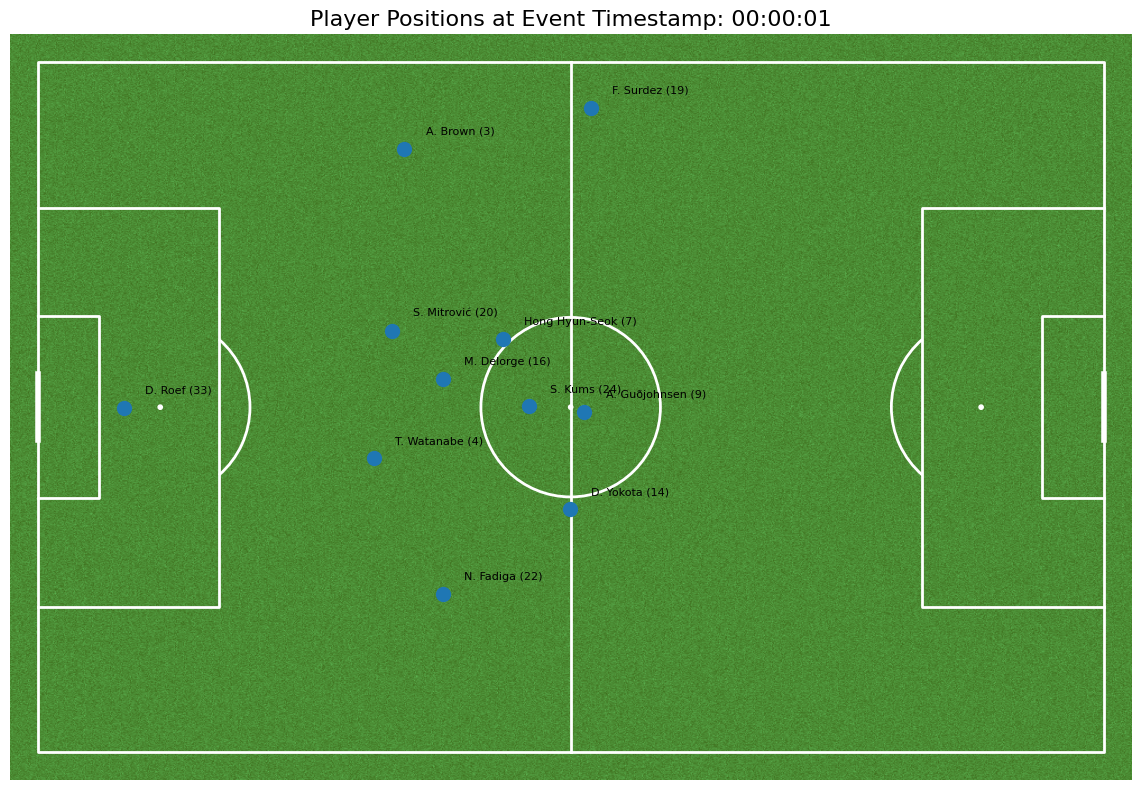

In [35]:
def plot_tracking_data(tracking_data):
    # Define pitch dimensions and colors
    pitch = Pitch(pitch_color='grass', line_color='white', pitch_type='opta',
                  pitch_length=105, pitch_width=68)  # Adjust dimensions if necessary
    fig, ax = pitch.draw(figsize=(12, 8))
    
    # Extract timestamp and team names
    timestamp = tracking_data['timestamp'].iloc[0]
    team_names = tracking_data['team_id'].unique()
    colors = mpl.colors.TABLEAU_COLORS
    color_map = {team: color for team, color in zip(team_names, colors.values())}
    
    # Plot player positions
    for _, row in tracking_data.iterrows():
        x = row['x']
        y = row['y']
        player_name = row['player_name']
        team_name = row['team_id']
        jersey_no = row['jersey_number']
        
        # Plot the ball
        if row['player_name'] == 'Ball':
            pitch.scatter(x, y, s=90, color='yellow', ax=ax, label='Ball')
        else:
            # Plot players
            pitch.scatter(x, y, s=100, color=color_map[team_name], ax=ax, label=team_name)
        
        # Add player names (excluding the ball)
        if row['player_name'] != 'Ball':
            ax.text(x + 2, y + 2, f"{player_name} ({jersey_no})", fontsize=8)
    
    # Set title
    ax.set_title(f'Player Positions at Event Timestamp: {timestamp}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Example usage
frame_id = team1['frame_id'].unique()[0]  
# You can change this to any specific frame_id you want to visualize
filtered_tracking_df = team1[team1['frame_id'] == frame_id]

if filtered_tracking_df.empty:
    print(f"No data found for frame_id: {frame_id}")
else:
    plot_tracking_data(filtered_tracking_df)

Animation testing

x    0.24042
Name: 20374, dtype: float64 y    0.11311
Name: 20374, dtype: float64
x    0.24042
Name: 20374, dtype: float64 y    0.11311
Name: 20374, dtype: float64


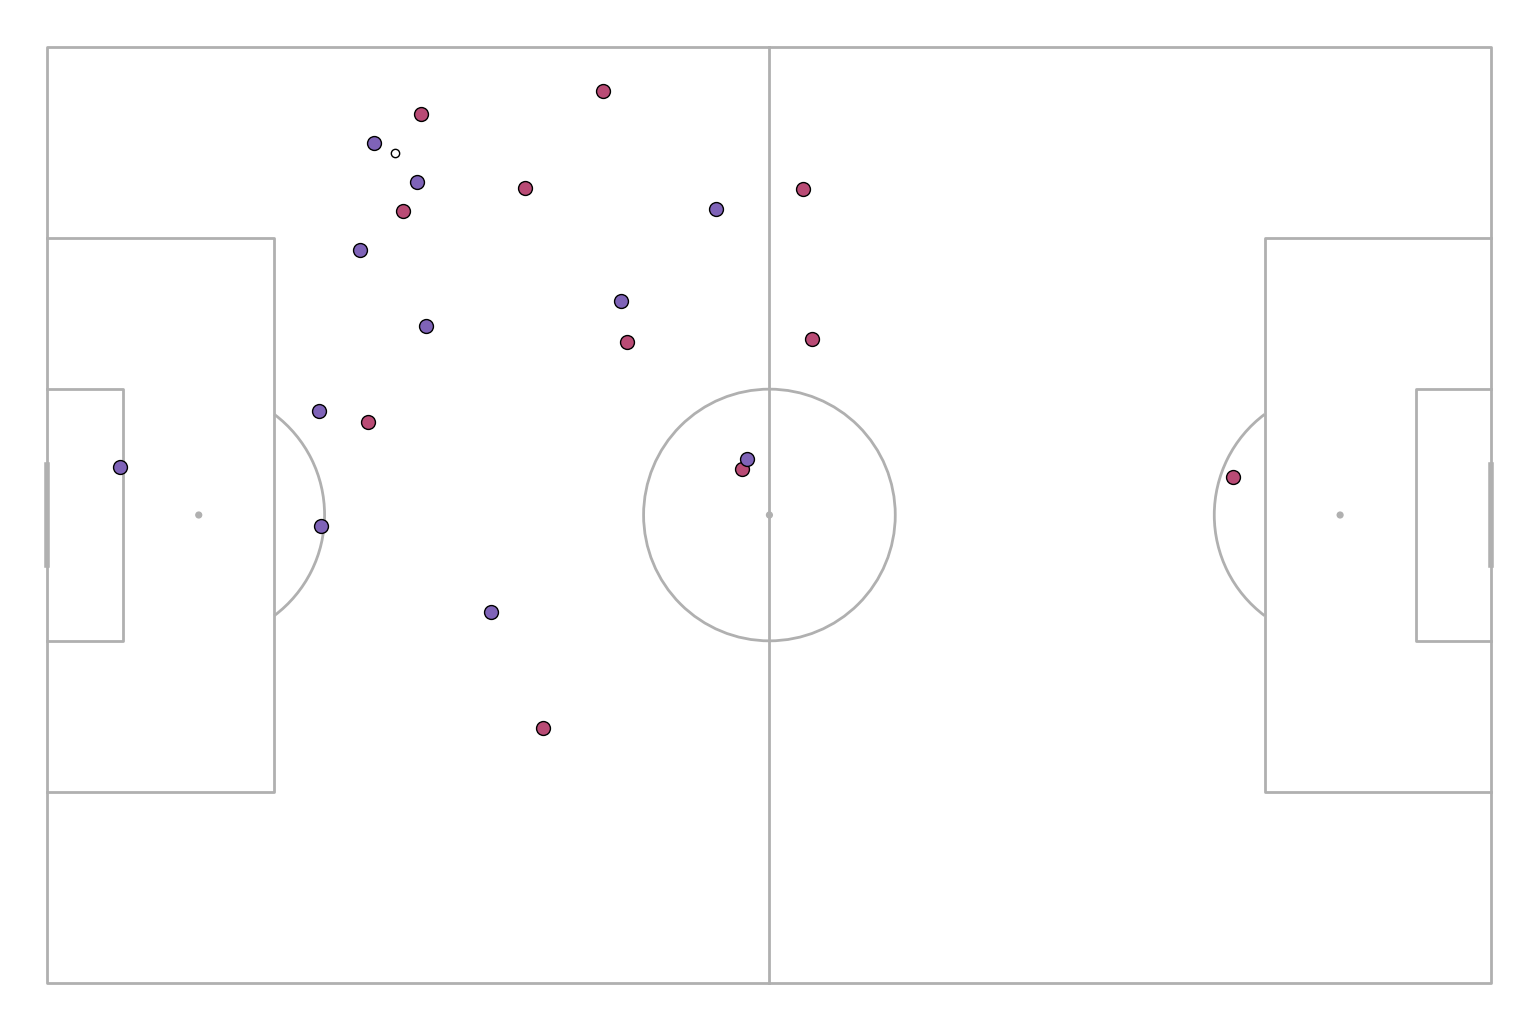

In [44]:
import numpy as np
import pandas as pd
from matplotlib import animation
from matplotlib import pyplot as plt

from mplsoccer import Pitch

##############################################################################
# Load the data

# load away data
LINK1 = ('https://raw.githubusercontent.com/metrica-sports/sample-data/master/'
         'data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv')
df_away = pd.read_csv(LINK1, skiprows=2)
df_away.sort_values('Time [s]', inplace=True)

# load home data
LINK2 = ('https://raw.githubusercontent.com/metrica-sports/sample-data/master/'
         'data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv')
df_home = pd.read_csv(LINK2, skiprows=2)
df_home.sort_values('Time [s]', inplace=True)

##############################################################################
# Reset the column names

# column names aren't great so this sets the player ones with _x and _y suffixes


def set_col_names(df):
    """ Renames the columns to have x and y suffixes."""
    cols = list(np.repeat(df.columns[3::2], 2))
    cols = [col+'_x' if i % 2 == 0 else col+'_y' for i, col in enumerate(cols)]
    cols = np.concatenate([df.columns[:3], cols])
    df.columns = cols


set_col_names(df_away)
set_col_names(df_home)

##############################################################################
# Subset 2 seconds of data

# get a subset of the data (10 seconds)
df_away = df_away[(df_away['Time [s]'] >= 815) & (df_away['Time [s]'] < 825)].copy()
df_home = df_home[(df_home['Time [s]'] >= 815) & (df_home['Time [s]'] < 825)].copy()

##############################################################################
# Split off the ball data, and drop the ball columns from the df_away/ df_home dataframes

# split off a df_ball dataframe and drop the ball columns from the player dataframes
df_ball = df_away[['Period', 'Frame', 'Time [s]', 'Ball_x', 'Ball_y']].copy()
df_home.drop(['Ball_x', 'Ball_y'], axis=1, inplace=True)
df_away.drop(['Ball_x', 'Ball_y'], axis=1, inplace=True)
df_ball.rename({'Ball_x': 'x', 'Ball_y': 'y'}, axis=1, inplace=True)

##############################################################################
# Convert to long form. So each row is a single player's coordinates for a single frame


# convert to long form from wide form
def to_long_form(df):
    """ Pivots a dataframe from wide-form (each player as a separate column) to long form (rows)"""
    df = pd.melt(df, id_vars=df.columns[:3], value_vars=df.columns[3:], var_name='player')
    df.loc[df.player.str.contains('_x'), 'coordinate'] = 'x'
    df.loc[df.player.str.contains('_y'), 'coordinate'] = 'y'
    df = df.dropna(axis=0, how='any')
    df['player'] = df.player.str[6:-2]
    df = (df.set_index(['Period', 'Frame', 'Time [s]', 'player', 'coordinate'])['value']
          .unstack()
          .reset_index()
          .rename_axis(None, axis=1))
    return df


df_away = to_long_form(df_away)
df_home = to_long_form(df_home)

##############################################################################
# Show the away data
df_away.head()

##############################################################################
# Show the home data
df_home.head()

##############################################################################
# Show the ball data
df_ball.head()

##############################################################################
# Plot the animation

# First set up the figure, the axis
pitch = Pitch(pitch_type='metricasports', goal_type='line', pitch_width=68, pitch_length=105)
fig, ax = pitch.draw(figsize=(16, 10.4))

# then setup the pitch plot markers we want to animate
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
ball, = ax.plot([], [], ms=6, markerfacecolor='w', zorder=3, **marker_kwargs)
away, = ax.plot([], [], ms=10, markerfacecolor='#b94b75', **marker_kwargs)  # red/maroon
home, = ax.plot([], [], ms=10, markerfacecolor='#7f63b8', **marker_kwargs)  # purple


# animation function
def animate(i):
    """ Function to animate the data. Each frame it sets the data for the players and the ball."""
    # set the ball data with the x and y positions for the ith frame
    ball.set_data(df_ball.iloc[i, [3]], df_ball.iloc[i, [4]])
    print(df_ball.iloc[i, [3]], df_ball.iloc[i, [4]])
    # get the frame id for the ith frame
    frame = df_ball.iloc[i, 1]
    # set the player data using the frame id
    away.set_data(df_away.loc[df_away.Frame == frame, 'x'],
                  df_away.loc[df_away.Frame == frame, 'y'])
    home.set_data(df_home.loc[df_home.Frame == frame, 'x'],
                  df_home.loc[df_home.Frame == frame, 'y'])
    return ball, away, home


# call the animator, animate so 25 frames per second
anim = animation.FuncAnimation(fig, animate, frames=120 
                               #frames=len(df_ball)
                               , interval=120, blit=True)
plt.show()

# note that its hard to get the ffmpeg requirements right.
# I installed from conda-forge: see the environment.yml file in the docs folder
# how to save animation - commented out for example
# anim.save('example.mp4', dpi=150, fps=25,
#          extra_args=['-vcodec', 'libx264'],
#          savefig_kwargs={'pad_inches':0, 'facecolor':'#457E29'})

In [41]:
print(df_ball.head())

        frame_id        timestamp player_id          x          y  \
0  1722802500280  00:00:00.280000      ball  45.750820  50.091803   
1  1722798901000         00:00:01      ball  46.832787  49.868852   
2  1722802501280  00:00:01.280000      ball  37.137500  51.901639   
3  1722798902000         00:00:02      ball  46.311475  54.131148   
4  1722802502280  00:00:02.280000      ball  35.024224  54.380328   

                     team_id  
0  1oyb7oym5nwzny8vxf03szd2h  
1  1oyb7oym5nwzny8vxf03szd2h  
2  1oyb7oym5nwzny8vxf03szd2h  
3  1oyb7oym5nwzny8vxf03szd2h  
4  1oyb7oym5nwzny8vxf03szd2h  
